In [1]:
%pip install seaborn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [5]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.127766
volatile acidity       -0.391735
citric acid             0.233733
residual sugar          0.016464
chlorides              -0.119770
free sulfur dioxide    -0.048641
total sulfur dioxide   -0.185404
density                -0.173251
pH                     -0.063373
sulphates               0.270777
alcohol                 0.480738
Name: quality, dtype: float64


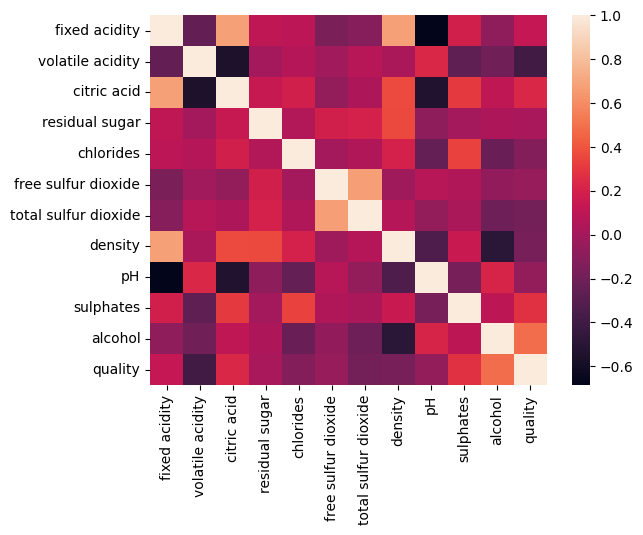

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [8]:
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [12]:
y_test.shape

(399,)

In [13]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
train_prd = regressor.predict(x_train)
train_prd

array([6.11925935, 5.07227311, 6.7399964 , ..., 6.23635879, 5.35178136,
       6.32750778])

In [15]:
test_prd = regressor.predict(x_test)
test_prd


array([5.86429918, 6.58886189, 5.60088963, 5.53399627, 5.2069917 ,
       5.09587692, 5.25649938, 6.05502716, 5.54817139, 6.43722161,
       5.72389284, 6.39864078, 5.45459143, 6.16950366, 5.57081187,
       5.49991892, 5.33803653, 6.47137126, 5.0728566 , 5.49996371,
       6.17077014, 5.42306165, 6.04859963, 5.41030153, 5.49823429,
       5.36925877, 6.38293691, 4.98228202, 5.14522413, 6.62198618,
       5.21677452, 5.21512264, 6.16889261, 5.91873413, 6.27884601,
       5.47139153, 5.06607822, 5.0132125 , 5.31978199, 5.84570274,
       5.87748035, 6.45439888, 5.15719508, 5.30573786, 6.1118515 ,
       5.62564091, 5.08135462, 5.41678578, 5.25670793, 5.07842467,
       6.04623273, 5.75313017, 5.31585972, 5.13455306, 5.99592224,
       6.07679958, 5.79688814, 5.03100173, 5.47702746, 6.0915115 ,
       5.64015282, 5.96072677, 6.02768139, 5.5327184 , 5.25022904,
       5.77024179, 5.63780786, 5.99952942, 5.36342439, 5.54823979,
       5.34059946, 5.35809672, 5.84186268, 6.08360973, 6.00240

In [16]:
train_rmse = metrics.mean_squared_error(train_prd, y_train) ** 0.5
train_rmse

0.654186740478113

In [17]:
test_rmse = metrics.mean_squared_error(test_prd, y_test) ** 0.5
test_rmse

0.6092685493206992

In [18]:
predictedData = np.round_(test_prd)
predictedData

array([6., 7., 6., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 6., 6., 5., 5.,
       6., 5., 5., 6., 5., 6., 5., 5., 5., 6., 5., 5., 7., 5., 5., 6., 6.,
       6., 5., 5., 5., 5., 6., 6., 6., 5., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 5., 5., 6., 6., 6., 5., 5., 6., 6., 6., 6., 6., 5., 6., 6., 6.,
       5., 6., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 5.,
       5., 5., 6., 7., 5., 6., 6., 6., 6., 6., 5., 6., 6., 6., 6., 5., 6.,
       5., 5., 6., 5., 5., 6., 7., 7., 6., 6., 6., 5., 6., 6., 5., 6., 5.,
       5., 5., 5., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 7., 6., 6.,
       5., 6., 6., 5., 6., 6., 5., 5., 6., 5., 5., 6., 7., 5., 5., 6., 5.,
       5., 5., 6., 6., 4., 5., 6., 7., 6., 7., 5., 5., 6., 6., 5., 6., 6.,
       5., 5., 5., 5., 5., 5., 5., 6., 6., 5., 6., 5., 5., 6., 5., 5., 5.,
       5., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 5., 6., 5., 7., 5., 5.,
       5., 6., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 6., 6.,
       6., 6., 5., 6., 6.

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_prd))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_prd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_prd)))

Mean Absolute Error: 0.4789318962041056
Mean Squared Error: 0.37120816519134925
Root Mean Squared Error: 0.6092685493206992


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,test_prd)

0.37914492565473923

In [21]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.034187
volatile acidity,-1.079450
citric acid,-0.270527
chlorides,-1.131896
total sulfur dioxide,-0.001790
density,-6.415957
pH,-0.399254
sulphates,0.933838
alcohol,0.307474
